In [1]:
import numpy as np
import pandas as pd
import math
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/Ynes/Downloads/cryptocurrencypricehistory (1)/litecoin_price.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,223.09,253.90,222.51,232.85,"1,739,670,000","12,335,100,000"
2018-02-19,215.41,226.97,215.38,223.06,"767,597,000","11,907,900,000"
2018-02-18,230.51,232.64,214.46,215.74,"1,011,120,000","12,738,800,000"
2018-02-17,229.50,233.45,225.60,229.47,"863,401,000","12,679,700,000"
2018-02-16,225.50,236.09,212.33,230.12,"1,300,090,000","12,455,300,000"


In [4]:
df.index

DatetimeIndex(['2018-02-20', '2018-02-19', '2018-02-18', '2018-02-17',
               '2018-02-16', '2018-02-15', '2018-02-14', '2018-02-13',
               '2018-02-12', '2018-02-11',
               ...
               '2013-05-07', '2013-05-06', '2013-05-05', '2013-05-04',
               '2013-05-03', '2013-05-02', '2013-05-01', '2013-04-30',
               '2013-04-29', '2013-04-28'],
              dtype='datetime64[ns]', name='Date', length=1760, freq=None)

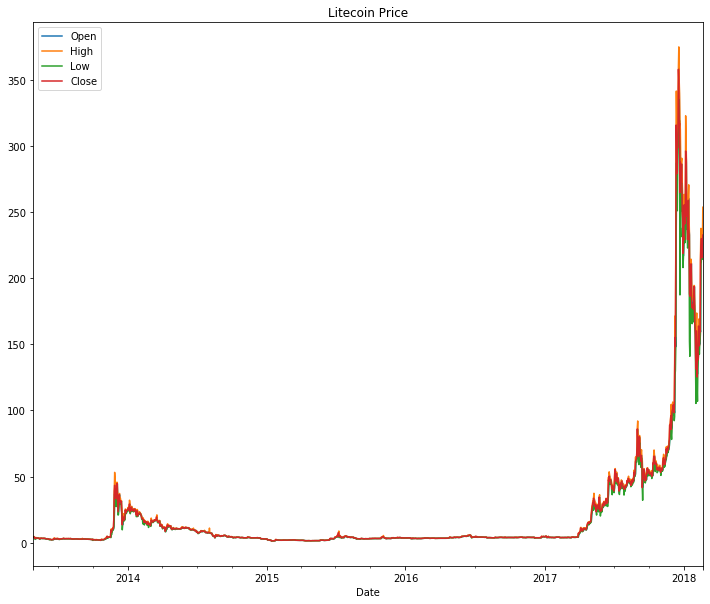

In [5]:
df.plot(figsize=(12,10),title='Litecoin Price')

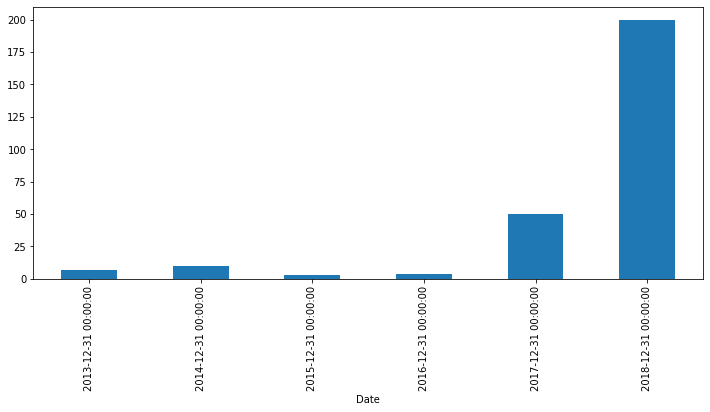

In [6]:
df['Close'].resample('Y').mean().plot.bar(figsize=(12,5))

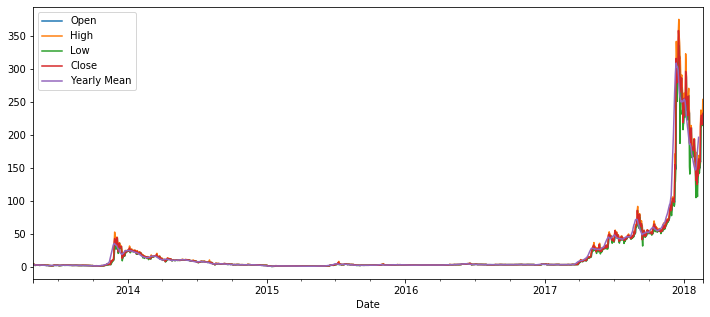

In [7]:
df['Yearly Mean']=df['Close'].rolling(window=12).mean()
df.plot(figsize=(12,5))

### Augmented Dickey Fuller Test 1

In [8]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(df['Close'])

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.09021369960816318, True)

### Augmented Dickey Fuller Test 2

In [9]:
from statsmodels.tsa.stattools import adfuller
series_litecoin = df['Close'].values
result = adfuller(series_litecoin, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key,value in result[4].items():
      print('Critical Values: ')
      print(f'{key},{value}')

ADF Statistic: -4.030429111723861
n_lags: 0.0012592947056740073
p-value: 0.0012592947056740073
Critical Values: 
1%,-3.434126820603039
Critical Values: 
5%,-2.8632082555189444
Critical Values: 
10%,-2.5676581314612825


Given that the dataset exhibits a p-value lower than the 5% significance level, the null hypothesis can be rejected and conclude stationarity

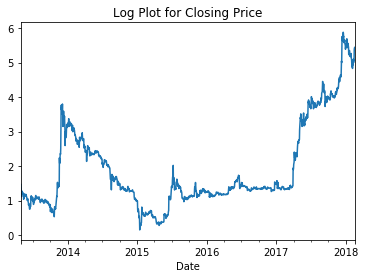

In [10]:
lnclose=np.log(df['Close'])
lnclose
lnclose.plot(title='Log Plot for Closing Price')
#adjusting for volatility

In [11]:
ln_list = lnclose.to_list()

In [12]:
from statsmodels.tsa.stattools import acf,pacf
import pandas as pd

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


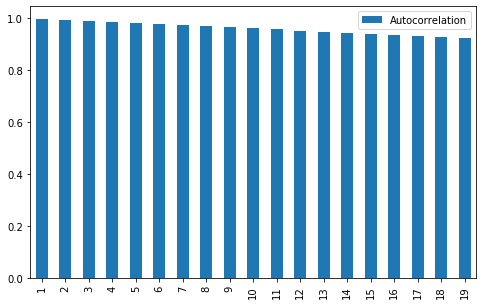

In [13]:
acf_1 = acf(lnclose)[1:20]
test_df = pd.DataFrame([acf_1]).T
test_df.columns = ['Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Gentle decrease downwards for each lag suggesting a high correllation between past and future values

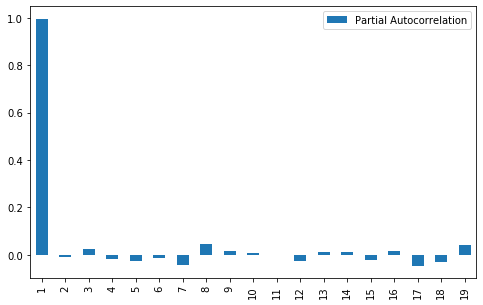

In [14]:
pacf_1 = pacf(lnclose)[1:20]
test_df = pd.DataFrame([pacf_1]).T
test_df.columns = ['Partial Autocorrelation']
test_df.index += 1
test_df.plot.bar(figsize=(8,5))

Sudden decrease downwards between first and subsequent lags suggesting we have a stationary AR1 time series

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Litecoin Integrated by order of 1')

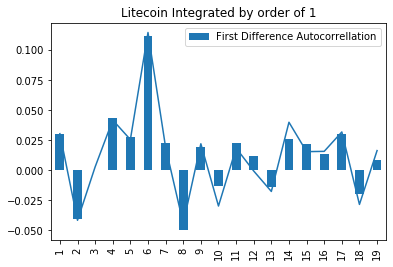

In [16]:
lnclose_diff=lnclose-lnclose.shift()
diff=lnclose_diff.dropna()
acf_1_diff = acf(diff)[1:20]
test_df = pd.DataFrame([acf_1_diff]).T
test_df.columns = ['First Difference Autocorrellation']
test_df.index +=1
test_df.plot.bar()
pacf_1_diff = pacf(diff)[1:20]
plt.plot(pacf_1_diff)
plt.title('Litecoin Integrated by order of 1')
#Integrated order of 1

### Augmented Dickey Fuller Test Post Differencing

In [17]:
from pmdarima.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(lnclose)

/Users/Ynes/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: is_stationary is deprecated and will be removed in a future release of pmdarima. Use should_diff instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(0.5408201767401163, True)

In [18]:
import matplotlib.pyplot as plt

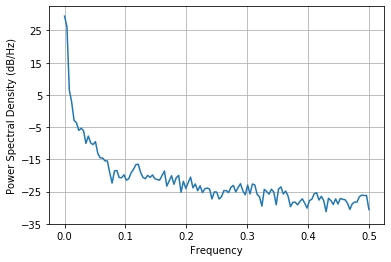

In [19]:
from spectrum import *
psd = WelchPeriodogram(ln_list, 256)

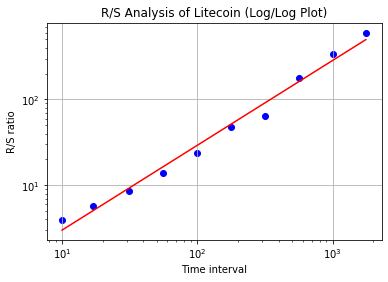

H=0.9883, c=0.3088


In [37]:
import numpy as np
import matplotlib.pyplot as plt
from hurst import compute_Hc

series = ln_list

H, c, data = compute_Hc(series, kind='price', simplified=True)

# Plot
f, g = plt.subplots()
g.plot(data[0], c*data[0]**H, color="red")
g.scatter(data[0], data[1], color="blue")
g.set_xscale('log')
g.set_yscale('log')
g.set_xlabel('Time interval')
g.set_ylabel('R/S ratio')
g.grid(True)
plt.title('R/S Analysis of Litecoin (Log/Log Plot)')
plt.show()

print("H={:.4f}, c={:.4f}".format(H,c))

In [33]:
import nolds

In [40]:
h = nolds.dfa(ln_list)

In [43]:
h

0.6188816470838545

In [36]:
print ('        #### Hurst Calculation Results for Litecoin #####    ')
print ('============================================================')
print ('  DFA Hurst Parameter Calculation : ',h)
print ('  R/S Analysis Hurst  Calculation : ',H)

        #### Hurst Calculation Results for Litecoin #####    
  DFA Hurst Parameter Calculation :  0.6188816470838545
  R/S Analysis Hurst  Calculation :  0.9883069622694174
